In [1]:
## This is demographicdata to get a better idea of our data for our future presentations
import pandas as pd # Used for data frames and other data frame functions.
import numpy as np # Used for arrays and other array functions as well as some math functions.
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt # Used for graphics and visuals.
import seaborn as sns # Used for visuals as well as exploring the data.


df = pd.read_csv("combined_dataset.csv")
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
print(df.shape)
df.head()

(34, 157)


,SCREENERID,GROUP,ELIGIBILITYRESCREENQ1,ELIGIBILITYRESCREENQ2,ELIGIBILITYRESCREENQ3,ELIGIBILITYRESCREENQ4,AGE2,GENDER2,RACE,RACEOTHER,HISPANICLATINO,LIVING,NUMBEROFROOMMATES,EDUCATION,EMPLOYMENT,INCOME,SEXUALORIENTATION,DRUGADDICTION,ALCOHOLADDICTION,HEALTHHIX22,HEALTHHIX23,WEIGHT,HEIGHT,BODYFAT,CHEST,LEGS,SHOULDERS,BICEPS,RHR,RBP,RHR2,RBP2,DAYSPASTWEEK,RTINTENSITY,MINSPERWORKOUT,MDI1,MDI2,MDI3,MDI4,MDI5,MDI6,MDI7,MDI8,MDI9,MDI10,MDI11,MDI12,MDI13,MDI14,MDI15,MDI16,MDISCORE,RS1,RS2,RS3,RS4,RS5,RS6,RS7,RS8,RS9,RS10,RSSCORE,BDS1,BDS2,BDS3,BDS4,BDS5,BDS6,BDS7,BDS8,BDS9,BDSSCORE,SPAS1,SPAS2,SPAS3,SPAS4,SPAS5,SPAS6,SPAS7,SPAS8,SPAS9,SPAS10,SPAS11,SPAS12,SPASSCORE,CESD1,CESD2,CESD3,CESD4,CESD5,CESD6,CESD7,CESD8,CESD9,CESD10,CESDSCORE,STAI1,STAI2,STAI3,STAI4,STAI5,STAI6,STAI7,STAI8,STAI9,STAI10,STAI11,STAI12,STAI13,STAI14,STAI15,STAI16,STAI17,STAI18,STAI19,STAI20,STAISCORE,SU1,SU2,SU3,SU4,SU5,SU6,SU7,SU8,SU9,SU10,AUDIT1,AUDIT2,AUDIT3,AUDITSCORE,SU111,SU112,SU113,SU114,SU115,SU116,SU121,SU122,SU123,SU124,SU125,SU126,SU131,SU132,SU133,SU134,SU135,SU136,SU141,SU142,SU143,SU144,SU145,SU146,SU15
0,502,0.0,1,0,1,1,31.0,1,5,NaN,0,2,0.0,6,6,NaN,1,3,3,0,0,158.84,72.0,10.0,82.5,65.0,40.0,30.0,64.0,104/56,77.0,125/66,3.0,3.00,90,2,2,1,3,0,3,2,0,1,1,3,1,1,1,3,2,26,0,1,0,1,2,1,1,1,2,3,12,5,5,7,7,5,5,5,5,1,45,2.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,5.0,3.0,42.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,10.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,38.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,3.0,0.0,2.0,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,NaN
1,506,0.0,1,1,1,1,24.0,1,4,NaN,1,1,0.0,5,1,5.0,1,3,3,0,0,188.53,68.0,18.3,130.0,85.0,55.0,45.0,66.0,133/81,64.0,135/82,4.0,1.60,93,2,3,1,4,1,3,3,2,1,1,3,4,4,3,3,4,42,0,1,2,3,2,3,3,2,2,2,20,7,7,7,7,7,7,1,7,1,51,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,46.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,9.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,3.0,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,Preworkout
2,508,0.0,0,0,1,1,26.0,1,6,Indigenous and European ancestry,1,2,0.0,7,1,8.0,2,3,3,0,0,164.39,68.0,14.9,70.0,45.0,50.0,35.0,71.0,118/61,66.0,115/60,4.0,1.60,42,3,3,0,3,0,2,3,2,3,1,3,2,2,3,2,1,32,0,1,3,1,1,1,1,2,1,2,13,6,5,5,7,6,4,5,6,6,50,2.0,3.0,2.0,1.0,3.0,2.0,2.0,3.0,4.0,2.0,3.0,2.0,29.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,8.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,2.0,0.0,1.0,3.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,NaN
3,522,0.0,0,0,1,1,26.0,1,7,NaN,1,7,0.0,6,2,4.0,1,3,3,0,0,152.91,68.0,16.1,122.5,62.5,50.0,35.0,65.0,124/54,67.0,112/58,3.0,2.25,69,3,2,1,2,1,4,3,1,3,2,2,2,3,2,3,2,34,2,0,1,0,1,1,2,2,2,0,11,5,6,4,5,4,5,6,5,3,43,3.0,2.0,1.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,4.0,3.0,30.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,12.0,2.0,2.0,3.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,2.0,2.0,5.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,NaN
4,533,0.0,1,0,1,1,23.0,1,2,NaN,0,1,0.0,2,1,NaN,1,3,3,0,0,150.83,70.5,13.5,72.5,60.0,40.0,30.0,45.0,121/57,47.0,111/46,6.0,3.00,75,2,3,0,2,0,0,3,1,2,0,3,3,1,0,3,0,23,1,0,1,2,2,1,1,1,2,0,11,6,5,7,6,4,1,5,2,3,39,4.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,4.0,1.0,32.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,46.0,3.0,3.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,3.0,3.0,2.0,3.0,8.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,NaN


In [2]:
dfSubset = df[['AGE2', 'GENDER2', 'RACE', 'LIVING', 'NUMBEROFROOMMATES', 'EDUCATION', 
               'EMPLOYMENT', 'INCOME', 'SEXUALORIENTATION', 'DRUGADDICTION', 'ALCOHOLADDICTION',
               'DAYSPASTWEEK', 'RTINTENSITY', 'MINSPERWORKOUT']]
dfScores = df[['DAYSPASTWEEK', 'RTINTENSITY', 'MINSPERWORKOUT', 'HEIGHT', 'WEIGHT']]
dfScores2 = df[['MDISCORE', 'RSSCORE', 'BDSSCORE', 'SPASSCORE', 'CESDSCORE', 'STAISCORE', 'AUDITSCORE']]


dfSubset

,AGE2,GENDER2,RACE,LIVING,NUMBEROFROOMMATES,EDUCATION,EMPLOYMENT,INCOME,SEXUALORIENTATION,DRUGADDICTION,ALCOHOLADDICTION,DAYSPASTWEEK,RTINTENSITY,MINSPERWORKOUT
0,31.0,1,5,2,0.0,6,6,NaN,1,3,3,3.0,3.00,90
1,24.0,1,4,1,0.0,5,1,5.0,1,3,3,4.0,1.60,93
2,26.0,1,6,2,0.0,7,1,8.0,2,3,3,4.0,1.60,42
3,26.0,1,7,7,0.0,6,2,4.0,1,3,3,3.0,2.25,69
4,23.0,1,2,1,0.0,2,1,NaN,1,3,3,6.0,3.00,75
5,20.0,1,999,7,0.0,3,7,NaN,1,3,3,4.0,2.25,70
6,27.0,1,5,7,0.0,3,2,NaN,1,3,3,4.0,3.00,120
7,34.0,1,6,1,0.0,7,1,6.0,2,3,3,4.0,2.25,53
8,21.0,1,5,7,0.0,3,6,7.0,1,3,3,5.0,2.40,84
9,18.0,1,4,7,0.0,3,999,NaN,1,3,3,4.0,2.25,68


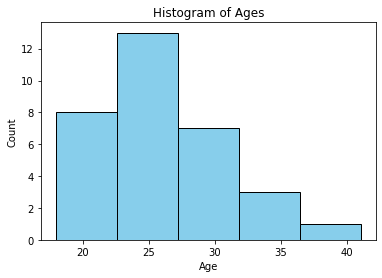

In [3]:
# Histogram with specified bar color
plt.hist(dfSubset['AGE2'], bins = 5, color = 'skyblue', edgecolor = 'black')  # 'skyblue' is the bar color

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Ages')

# Show the plot
plt.show()

C:\Users\RRC\AppData\Local\Temp/ipykernel_11848/28104459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSubset['RACE'] = dfSubset['RACE'][dfSubset['RACE'] != 999]


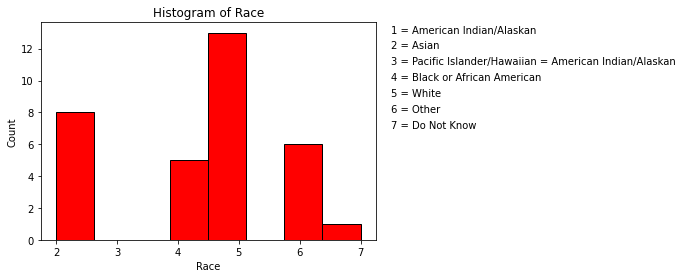

In [4]:
# Exclude the value 999 from Values_A
dfSubset['RACE'] = dfSubset['RACE'][dfSubset['RACE'] != 999]

# Histogram with specified bar color
plt.hist(dfSubset['RACE'], bins = 8, color = 'red', edgecolor = 'black')  # 'skyblue' is the bar color

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Histogram of Race')

plt.text(7.5, 13, '1 = American Indian/Alaskan', color = 'black')
plt.text(7.5, 12, '2 = Asian', color = 'black')
plt.text(7.5, 11, '3 = Pacific Islander/Hawaiian = American Indian/Alaskan', color = 'black')
plt.text(7.5, 10, '4 = Black or African American', color = 'black')
plt.text(7.5, 9, '5 = White', color = 'black')
plt.text(7.5, 8, '6 = Other', color = 'black')
plt.text(7.5, 7, '7 = Do Not Know', color = 'black')

# Show the plot
plt.show()

C:\Users\RRC\AppData\Local\Temp/ipykernel_11848/1993315108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSubset['LIVING'] = dfSubset['LIVING'][dfSubset['LIVING'] != 999]


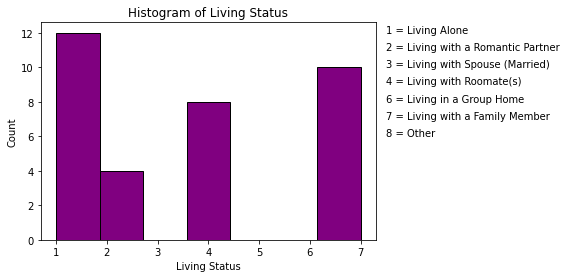

In [5]:
# Exclude the value 999 from Values_A
dfSubset['LIVING'] = dfSubset['LIVING'][dfSubset['LIVING'] != 999]

# Histogram with specified bar color
plt.hist(dfSubset['LIVING'], bins = 7, color = 'Purple', edgecolor = 'black')  # 'skyblue' is the bar color

# Add labels and title
plt.xlabel('Living Status')
plt.ylabel('Count')
plt.title('Histogram of Living Status')

plt.text(7.5, 12, '1 = Living Alone', color = 'black')
plt.text(7.5, 11, '2 = Living with a Romantic Partner', color = 'black')
plt.text(7.5, 10, '3 = Living with Spouse (Married)', color = 'black')
plt.text(7.5, 9, '4 = Living with Roomate(s)', color = 'black')
plt.text(7.5, 8, '6 = Living in a Group Home', color = 'black')
plt.text(7.5, 7, '7 = Living with a Family Member', color = 'black')
plt.text(7.5, 6, '8 = Other', color = 'black')

# Show the plot
plt.show()

C:\Users\RRC\AppData\Local\Temp/ipykernel_26948/1750514263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSubset['NUMBEROFROOMMATES'] = dfSubset['NUMBEROFROOMMATES'].fillna(-1)


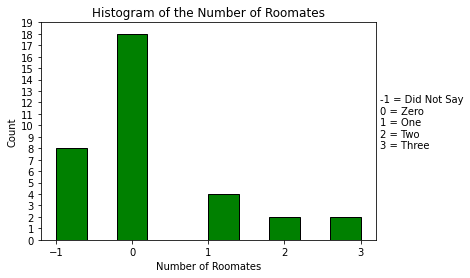

In [61]:
# Replace NaN values in 'Column1' with -1
dfSubset['NUMBEROFROOMMATES'] = dfSubset['NUMBEROFROOMMATES'].fillna(-1)

# Histogram with specified bar color
plt.hist(dfSubset['NUMBEROFROOMMATES'], bins = 10, color = 'Green', edgecolor = 'black')  # 'skyblue' is the bar color

# Add labels and title
plt.xlabel('Number of Roomates')
plt.ylabel('Count')
plt.title('Histogram of the Number of Roomates')

plt.text(3.25, 12, '-1 = Did Not Say', color = 'black')
plt.text(3.25, 11, '0 = Zero', color = 'black')
plt.text(3.25, 10, '1 = One', color = 'black')
plt.text(3.25, 9, '2 = Two', color = 'black')
plt.text(3.25, 8, '3 = Three', color = 'black')

# Set whole number ticks on the X-axis and Y-axis
plt.xticks(range(int(dfSubset['NUMBEROFROOMMATES'].min()), int(dfSubset['NUMBEROFROOMMATES'].max()) + 1))
plt.yticks(range(int(0), int(20)))

# Show the plot
plt.show()

C:\Users\RRC\AppData\Local\Temp/ipykernel_26948/1142043976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSubset['EDUCATION'] = dfSubset['EDUCATION'][dfSubset['EDUCATION'] != 999]


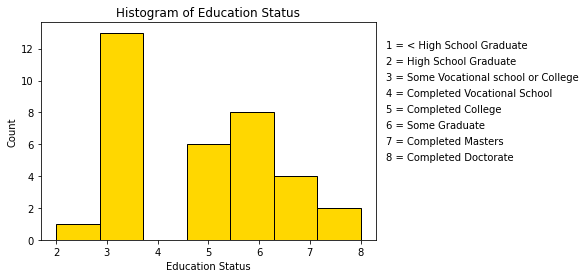

In [62]:
# Exclude the value 999 from Values_A
dfSubset['EDUCATION'] = dfSubset['EDUCATION'][dfSubset['EDUCATION'] != 999]

# Histogram with specified bar color
plt.hist(dfSubset['EDUCATION'], bins = 7, color = 'Gold', edgecolor = 'black')  # 'skyblue' is the bar color

# Add labels and title
plt.xlabel('Education Status')
plt.ylabel('Count')
plt.title('Histogram of Education Status')

plt.text(8.5, 12, '1 = < High School Graduate ', color = 'black')
plt.text(8.5, 11, '2 = High School Graduate', color = 'black')
plt.text(8.5, 10, '3 = Some Vocational school or College', color = 'black')
plt.text(8.5, 9, '4 = Completed Vocational School', color = 'black')
plt.text(8.5, 8, '5 = Completed College', color = 'black')
plt.text(8.5, 7, '6 = Some Graduate', color = 'black')
plt.text(8.5, 6, '7 = Completed Masters', color = 'black')
plt.text(8.5, 5, '8 = Completed Doctorate', color = 'black')

# Show the plot
plt.show()

C:\Users\RRC\AppData\Local\Temp/ipykernel_26948/2114391859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSubset['EMPLOYMENT'] = dfSubset['EMPLOYMENT'][dfSubset['EMPLOYMENT'] != 999]


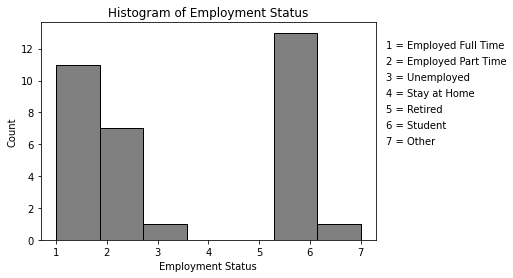

In [63]:
# Exclude the value 999 from Values_A
dfSubset['EMPLOYMENT'] = dfSubset['EMPLOYMENT'][dfSubset['EMPLOYMENT'] != 999]

# Histogram with specified bar color
plt.hist(dfSubset['EMPLOYMENT'], bins = 7, color = 'Grey', edgecolor = 'black')  # 'skyblue' is the bar color

# Add labels and title
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Histogram of Employment Status')

plt.text(7.5, 12, '1 = Employed Full Time', color = 'black')
plt.text(7.5, 11, '2 = Employed Part Time', color = 'black')
plt.text(7.5, 10, '3 = Unemployed', color = 'black')
plt.text(7.5, 9, '4 = Stay at Home', color = 'black')
plt.text(7.5, 8, '5 = Retired', color = 'black')
plt.text(7.5, 7, '6 = Student', color = 'black')
plt.text(7.5, 6, '7 = Other', color = 'black')

# Show the plot
plt.show()

In [67]:
dfScores.describe().drop('count')

,DAYSPASTWEEK,RTINTENSITY,MINSPERWORKOUT,HEIGHT,WEIGHT
mean,3.794118,2.283824,71.352941,69.779412,173.108824
std,0.913847,0.404093,24.951932,2.686079,26.920422
min,1.000000,1.600000,42.000000,63.000000,131.360000
25%,3.000000,2.025000,60.000000,68.000000,152.077500
50%,4.000000,2.150000,63.500000,69.250000,169.550000
75%,4.000000,2.550000,81.750000,71.000000,196.405000
max,6.000000,3.000000,165.000000,77.000000,223.730000


In [70]:
print("MDI deals with Muscle Dismorphia")
print("RS deals with Eating and Gaining/Losing Weight")
print("BDS deals with Emotions with Missing or Skipping Workouts")
print("SPAS deals with Body Image")
print("CESD deals with Emotions")
print("STAI deals with Mental Health and Emotions")
print("Audit deals with Alcohol Consumption")
print("Higher Values = Lower Mental Health")
dfScores2.describe().drop('count')



MDI deals with Muscle Dismorphia
RS deals with Eating and Gaining/Losing Weight
BDS deals with Emotions with Missing or Skipping Workouts
SPAS deals with Body Image
CESD deals with Emotions
STAI deals with Mental Health and Emotions
Audit deals with Alcohol Consumption
Higher Values = Lower Mental Health


,MDISCORE,RSSCORE,BDSSCORE,SPASSCORE,CESDSCORE,STAISCORE,AUDITSCORE
mean,30.352941,15.764706,42.529412,37.705882,10.117647,47.735294,3.878788
std,9.464070,5.929172,7.337059,8.966366,5.220964,11.070870,2.446395
min,7.000000,4.000000,28.000000,20.000000,1.000000,29.000000,0.000000
25%,25.250000,11.250000,37.500000,30.000000,5.250000,38.250000,2.000000
50%,31.000000,15.000000,44.000000,38.500000,10.500000,46.000000,4.000000
75%,37.750000,20.000000,48.750000,44.750000,12.000000,55.250000,6.000000
max,49.000000,27.000000,54.000000,54.000000,22.000000,74.000000,9.000000
